In [2]:
# author: Milan Mulji

In [3]:
import os
import shutil
import numpy  as np
import pandas as pd
import mlflow as mf
import matplotlib.pylab as pylab
import glob

# MLFlow Projects API

The Projects component of MLflow allows you to package your application so that it can be easily reproduced.
The Projects component also includes an API and command line components, making it possible to chain together workflows.

## conda.yaml File
The conda.yaml file contains all the dependencies required for your project.

```sh
name: tutorial_part_4
channels:
  - defaults
dependencies:
  - numpy=1.14.3
  - pandas=0.22.0
  - scikit-learn=0.19.1
  - click
  - pip:
    - mlflow
```

## MLproject File

An optional MLproject file allows you to specify the project name, the entrypoint, the required environment and finally any additional workflow steps that you may want to codify.


```sh
name: multistep_example

conda_env: conda.yaml

entry_points:
  main:
    parameters:
      param_one: {type: int, default: 10}
      param_two: {type: int, default: 20}
      param_three: {type: int, default: 100000}
    command: "python3 main.py"
```

## MLproject Environment Settings

We have 3 kinds of environment where we can run our project:

- System environment (useful for non-dockerisable dependencies)
- Conda environment
- Docker environment (useful for jvm /.net dependencies)


## Hands On: Running an MLproject

We goto the directory containing the project files for notebook 4.

In [4]:
! pwd
! cd ./4.projects

/Users/mmulji/development/signify/PyCon/mlflow_tutorial/notebooks


Then we run the project using the mlflow run command.
MLFlow will then start downloading the required dependencies and then run the project.
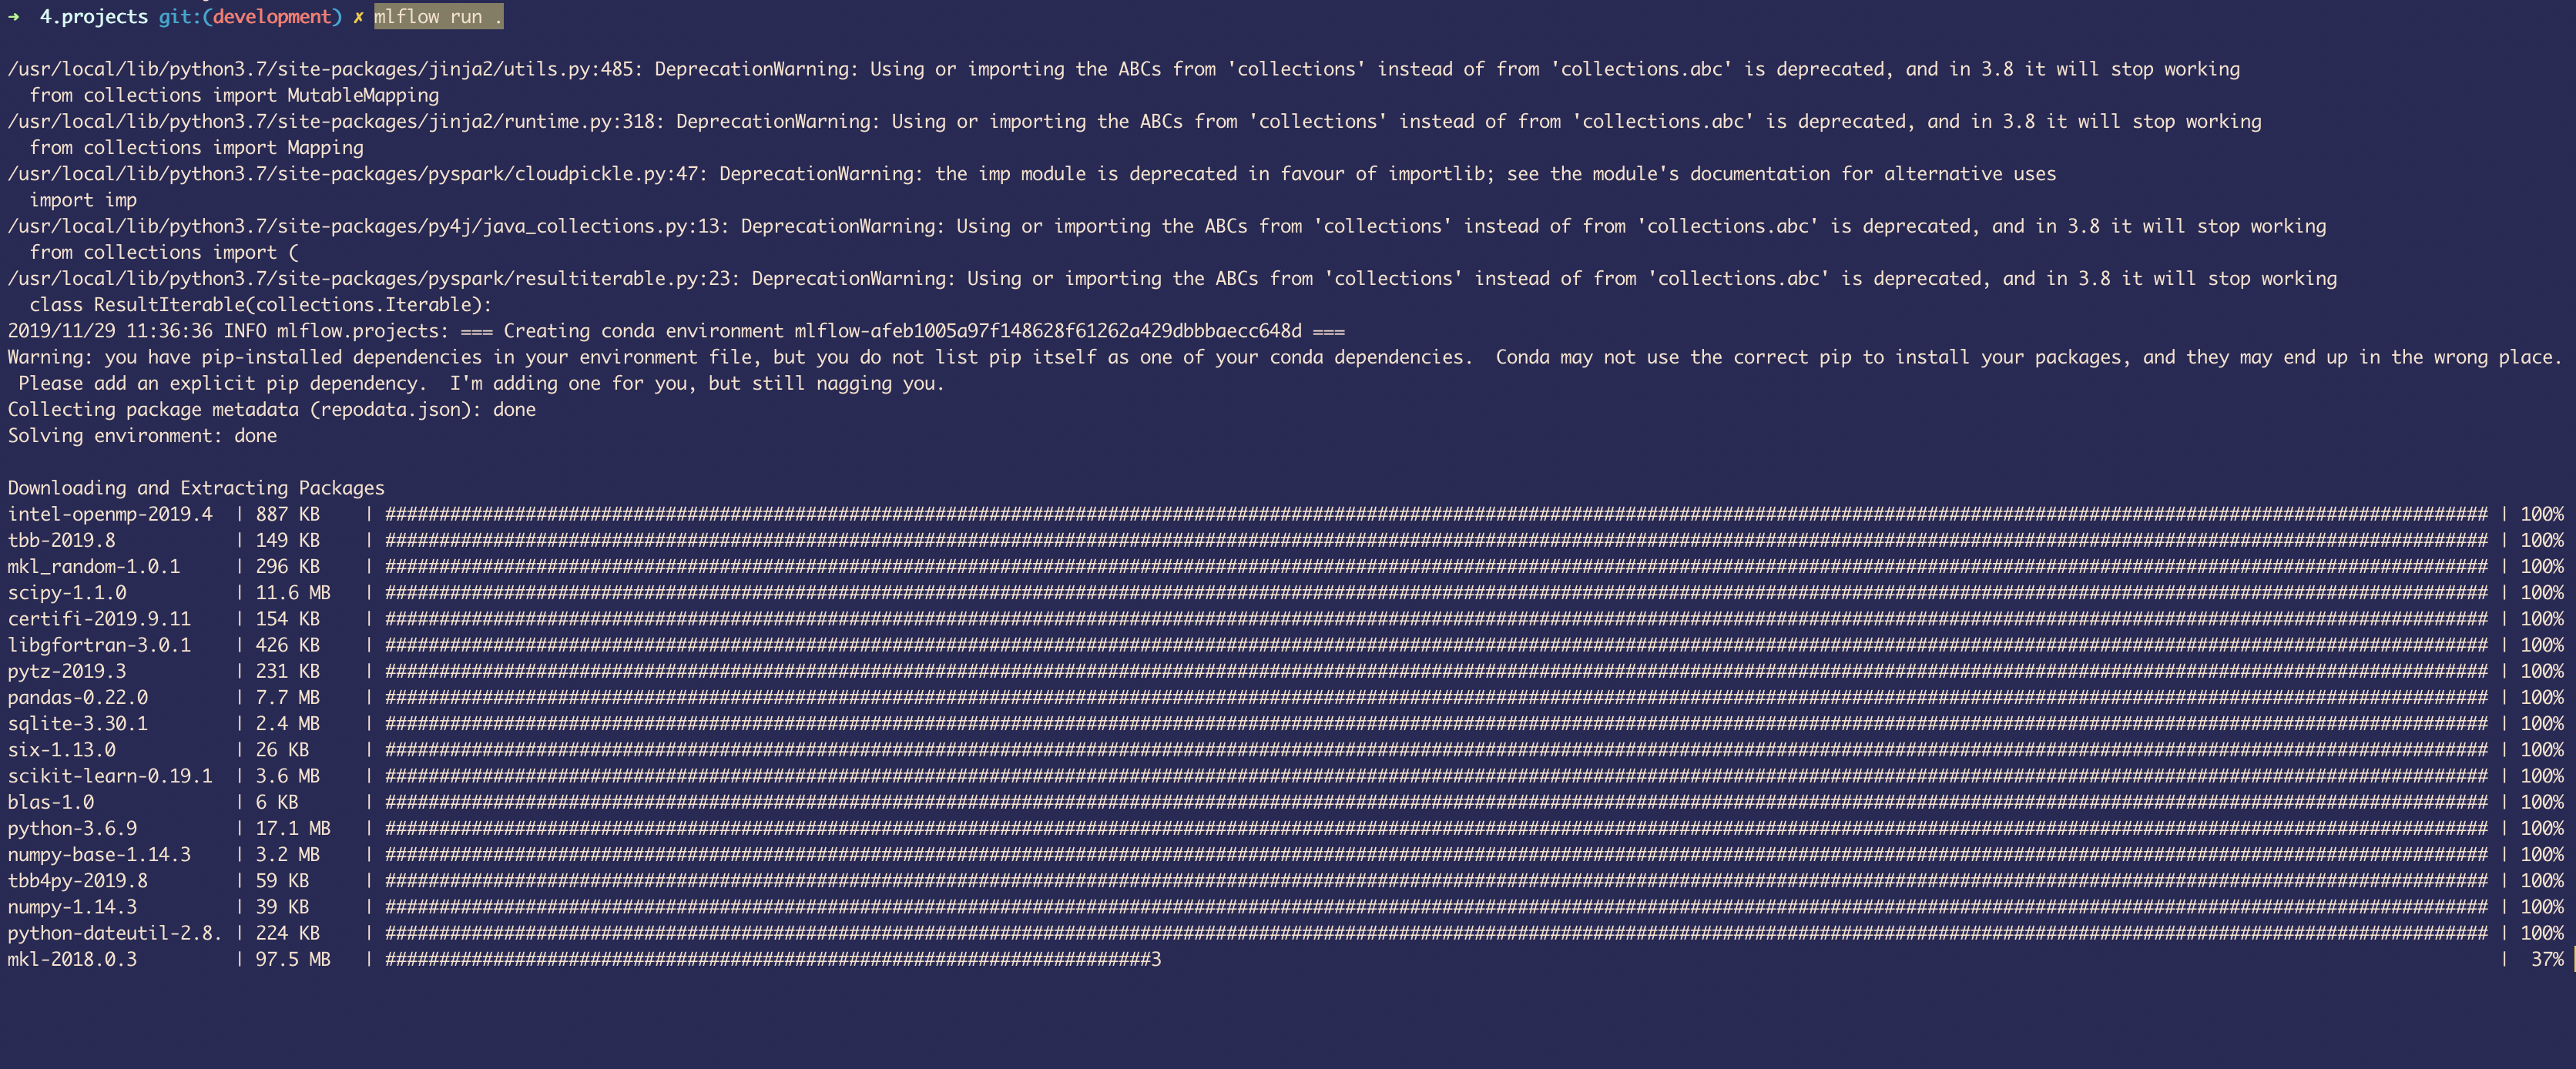

In [10]:
# This will run with the Conda environment
!pwd
!cd 4.projects && mlflow run --no-conda .

# To run without Conda, supply the --no-conda switch
# mlflow run --no-conda .

/Users/mmulji/development/signify/PyCon/mlflow_tutorial/notebooks
/usr/local/lib/python3.7/site-packages/jinja2/utils.py:485: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/usr/local/lib/python3.7/site-packages/jinja2/runtime.py:318: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/site-packages/pyspark/cloudpickle.py:47: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
/usr/local/lib/python3.7/site-packages/py4j/java_collections.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections im

![image.png](attachment:image.png)

## Hands On: Running ML Flow using Docker

For applications where you need non-Python dependencies, then a nice way to package these dependencies can be using a Docker file.

Once packaged, the Docker image 'talks' to the tracking API so that your application runs are recorded. MLFlow also mounts the mlruns directory to the Docker image.

You can use Docker images from either a local or remote docker registry.


Goto your conda.yaml file and then uncomment the Docker environment statements and comment the Conda environment.

```yaml
name: multistep_example

conda_env: conda.yaml

#docker_env:
#  image:  python

entry_points:
  main:
    parameters:
      param_one: {type: int, default: 10}
      param_two: {type: int, default: 20}
      param_three: {type: int, default: 100000}
    command: "python3 main.py"
    
```

We can specify the property values directly via the commmand line.

```sh
mlflow run -P param_one=100 -P param_two=200 -P param_three=300 --no-conda .
```

## Using Multistep Workflows

Multi step workflows can reference multiple steps in the same project or other in projects. This allows us to chain more complicated workflows together.

## Why?

- Make reusable steps for training, validation, data featurization, …
- Hyperparameter tuning (run multiple jobs in parallel)
- Cross validation (rerun training with random split of training and validation data)


